In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data preparation

In [105]:
df = pd.read_csv('spotify_songs.csv')

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


In [107]:
df.track_name.value_counts()

track_name
Poison                    22
Breathe                   21
Alive                     20
Forever                   20
Stay                      19
                          ..
Quien Eres Tu              1
Como Nadie                 1
Ya No Estás Aquí           1
Ojala                      1
Typhoon - Original Mix     1
Name: count, Length: 23449, dtype: int64

track name with accent

In [108]:
df.track_album_name.value_counts()

track_album_name
Greatest Hits                  139
Ultimate Freestyle Mega Mix     42
Gold                            35
Malibu                          30
Rock & Rios (Remastered)        29
                              ... 
A Mouthful                       1
Blonde comme moi                 1
Every Second Counts              1
Birdy (Deluxe Version)           1
Typhoon/Storm                    1
Name: count, Length: 19743, dtype: int64

track album with special characters

In [109]:
artists_count = df.track_artist.value_counts()

In [110]:
artists_count

track_artist
Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Underworld            1
The Witches           1
Tess Parks            1
Mick Harvey           1
Mat Zo                1
Name: count, Length: 10692, dtype: int64

In [111]:
df.track_artist.tail(25)

32808                               Hardwell
32809                             Chris Lake
32810                           Gareth Emery
32811                                Qubicon
32812                                 Avicii
32813                               Borgeous
32814                               Vicetone
32815                             The Wanted
32816                                 Dannic
32817                       Armin van Buuren
32818                               CAZZETTE
32819                           Michael Brun
32820                                 Audien
32821                         Adventure Club
32822                         Sevyn Streeter
32823                               Hardwell
32824                                 Avicii
32825                                Showtek
32826                                 Tiësto
32827    Ferry Corsten feat. Jenny Wahlstrom
32828                           Lush & Simon
32829                         Tegan and Sara
32830     

artist name with uppercase and lowecase, ponctuation

In [112]:
df.playlist_genre.value_counts()

playlist_genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

In [113]:
df.playlist_subgenre.value_counts()

playlist_subgenre
progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1458
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     949
Name: count, dtype: int64

In [114]:
df.track_album_release_date.tail(10)

32823    2014-04-18
32824    2013-01-01
32825    2013-01-01
32826    2014-04-22
32827          2013
32828    2014-04-28
32829    2013-03-08
32830    2014-04-21
32831    2014-01-01
32832    2014-03-03
Name: track_album_release_date, dtype: object

In [115]:
df = df.drop(columns='track_album_release_date')

playlist name with emoji and special characters

check the Null values


In [116]:
null_perc = (df.isna().sum()) / len(df) * 100

In [117]:
null_perc.round(3)

track_id             0.000
track_name           0.015
track_artist         0.015
track_popularity     0.000
track_album_id       0.000
track_album_name     0.015
playlist_name        0.000
playlist_id          0.000
playlist_genre       0.000
playlist_subgenre    0.000
danceability         0.000
energy               0.000
key                  0.000
loudness             0.000
mode                 0.000
speechiness          0.000
acousticness         0.000
instrumentalness     0.000
liveness             0.000
valence              0.000
tempo                0.000
duration_ms          0.000
dtype: float64

In [118]:
#nan_rows = df[pd.isna(df['track_album_release_date'])]
#nan_rows

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           32833 non-null  object 
 1   track_name         32828 non-null  object 
 2   track_artist       32828 non-null  object 
 3   track_popularity   32833 non-null  int64  
 4   track_album_id     32833 non-null  object 
 5   track_album_name   32828 non-null  object 
 6   playlist_name      32833 non-null  object 
 7   playlist_id        32833 non-null  object 
 8   playlist_genre     32833 non-null  object 
 9   playlist_subgenre  32833 non-null  object 
 10  danceability       32833 non-null  float64
 11  energy             32833 non-null  float64
 12  key                32833 non-null  int64  
 13  loudness           32833 non-null  float64
 14  mode               32833 non-null  int64  
 15  speechiness        32833 non-null  float64
 16  acousticness       328

In [120]:
df = df.dropna(subset=['track_album_name', 'track_artist', 'track_name'])

In [121]:
df.isna().sum()

track_id             0
track_name           0
track_artist         0
track_popularity     0
track_album_id       0
track_album_name     0
playlist_name        0
playlist_id          0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

In [122]:
df.tempo.describe()

count    32828.000000
mean       120.883642
std         26.903632
min          0.000000
25%         99.961000
50%        121.984000
75%        133.918250
max        239.440000
Name: tempo, dtype: float64

How could a music have 0 tempo?

In [123]:
df_zero_tempo = df[df['tempo'] == 0]
df_zero_tempo

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11363,51w6nRCU68klqNfYaaVP2j,"Hi, How're You Doin'?",DREAMS COME TRUE,0,4wdK52JVu5GzhxW3RCZ3AV,Dreams Come True,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,album rock,...,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


In [124]:
df = df.drop(index=11363)

df_zero_tempo = df[df['tempo'] == 0]
df_zero_tempo

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


We have duplicated track_id ?

In [125]:
duplicated_track_ids = df[df['track_id'].duplicated(keep=False)]
duplicated_track_ids

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.613,124.008,176616
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,8,-5.385,1,0.1270,0.079900,0.000000,0.1430,0.585,124.982,163049
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,4,-2.419,0,0.0434,0.033500,0.000005,0.1110,0.367,127.936,207619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32783,1mzGywacjpeik00PVLBPpF,All of Me (Tiësto's Birthday Treatment Remix) ...,John Legend,64,4c2rSdHI9WUXn0zyXoWtbB,All of Me (Tiësto's Birthday Treatment Remix) ...,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,5,-6.253,0,0.0283,0.000151,0.001650,0.0745,0.179,127.986,251613
32793,1nas007nDbzLwDGwvMdz79,How You Love Me,3LAU,52,0IsgaoqRfJAJ6wojxWDZ7C,How You Love Me,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,1,-3.648,1,0.0839,0.183000,0.000000,0.3400,0.286,127.961,210469
32798,65hRZOQkVjmBdusz1N7aOv,Save The World,Swedish House Mafia,67,728voOLBbJUBgK2vooghcS,Save The World,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,0,-7.598,1,0.0474,0.014400,0.000000,0.0759,0.400,126.879,213338
32804,2KlZexJjJPuNWcN5uAG1GU,Gold (feat. Yuna),Adventure Club,1,2DVyzKYzqlQo4uTJLVtvBt,Calling All Heroes - EP,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,...,9,-4.893,0,0.0413,0.031900,0.005360,0.1280,0.189,145.022,257045


In [126]:
df = df.drop_duplicates(subset='track_id', keep='first')

### EDA

<Axes: xlabel='duration_ms', ylabel='Count'>

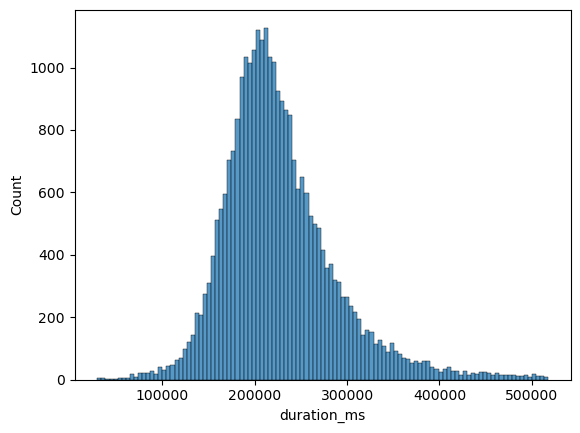

In [127]:
sns.histplot(df.duration_ms)

<Axes: xlabel='track_popularity', ylabel='Count'>

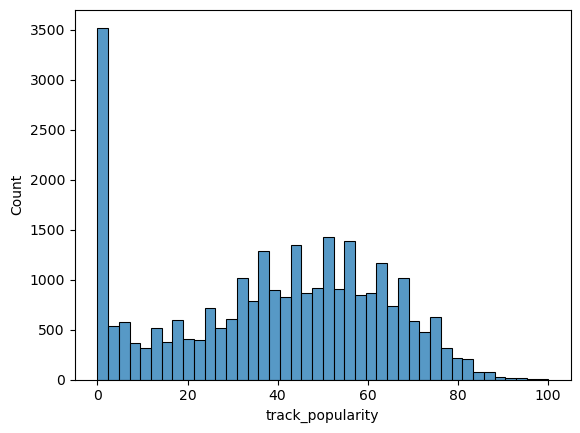

In [128]:
sns.histplot(df.track_popularity)

In [129]:
df.track_popularity.value_counts(normalize=True)

track_popularity
0      0.092237
1      0.019259
51     0.017072
57     0.016895
54     0.016719
         ...   
97     0.000106
95     0.000071
100    0.000035
96     0.000035
99     0.000035
Name: proportion, Length: 101, dtype: float64

<Axes: xlabel='valence', ylabel='Count'>

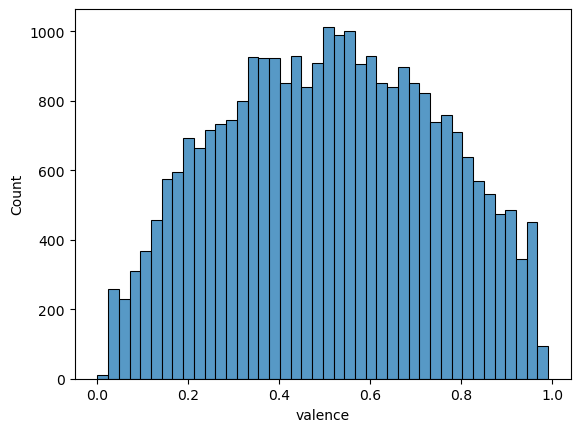

In [130]:
sns.histplot(df.valence)

<Axes: xlabel='playlist_genre', ylabel='track_popularity'>

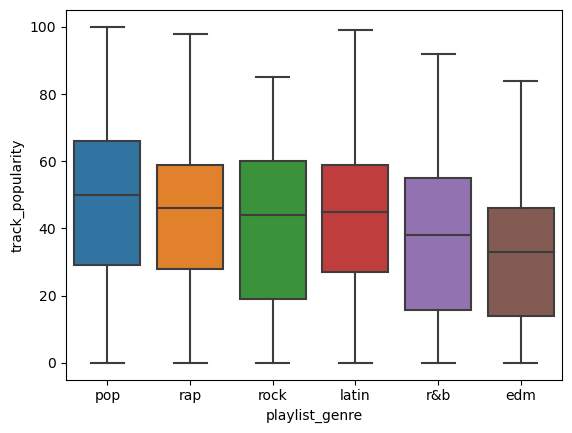

In [131]:
sns.boxplot(data=df, x='playlist_genre', y='track_popularity')

<Axes: xlabel='playlist_genre', ylabel='duration_ms'>

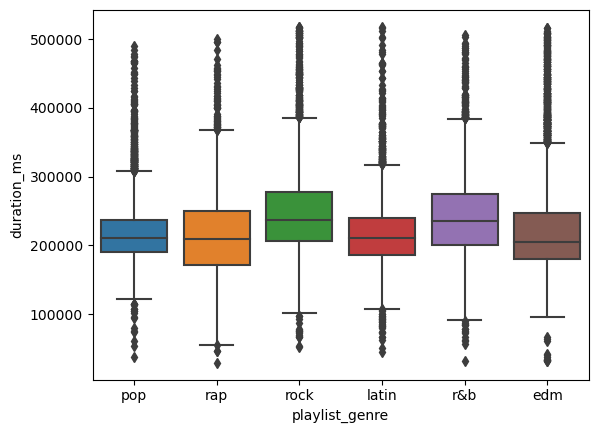

In [132]:
sns.boxplot(data=df, x='playlist_genre', y='duration_ms')

/root/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


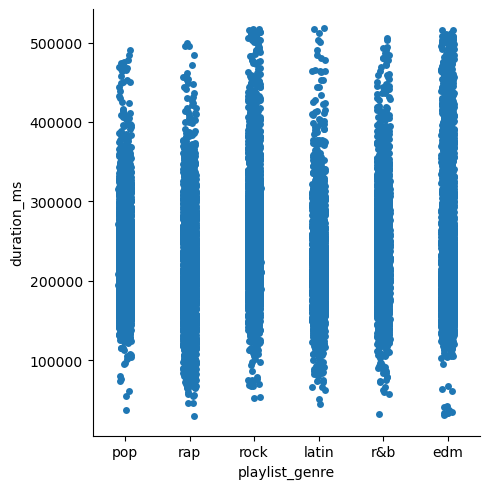

In [133]:
sns.catplot(data=df, x='playlist_genre', y='duration_ms')

<Axes: xlabel='key', ylabel='valence'>

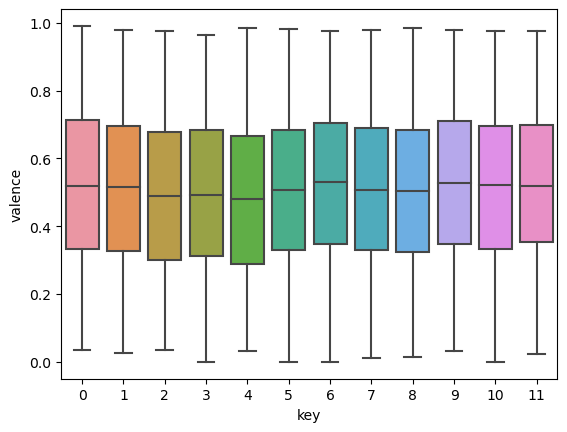

In [134]:
sns.boxplot(data=df, x='key', y='valence')

<Axes: xlabel='mode', ylabel='valence'>

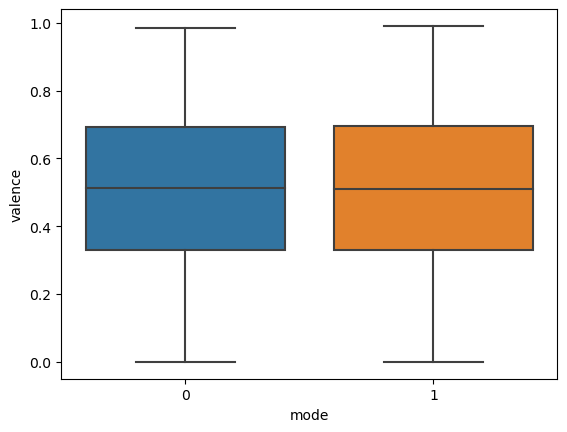

In [135]:
sns.boxplot(data=df, x='mode', y='valence')

Major and minor scales have both the same level of valence.

<Axes: >

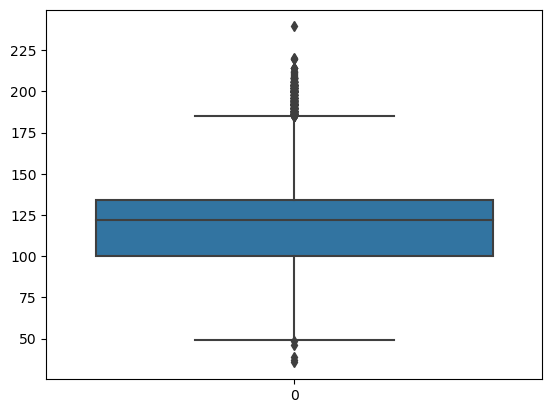

In [136]:
sns.boxplot(df.tempo)

<Axes: xlabel='tempo', ylabel='Count'>

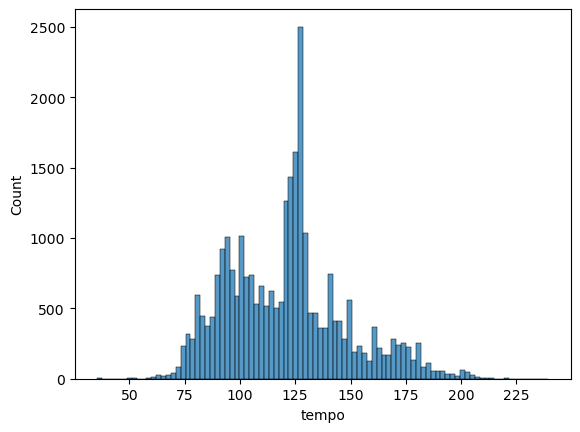

In [137]:
sns.histplot(df.tempo)

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms

<Axes: >

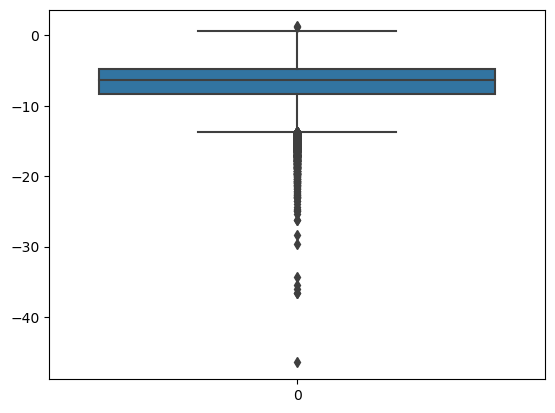

In [138]:
sns.boxplot(df.loudness)

Normalize loudness

In [142]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_scaled = ['loudness']
df['loudness'] = scaler.fit_transform(df[feature_scaled])

<Axes: xlabel='loudness', ylabel='Count'>

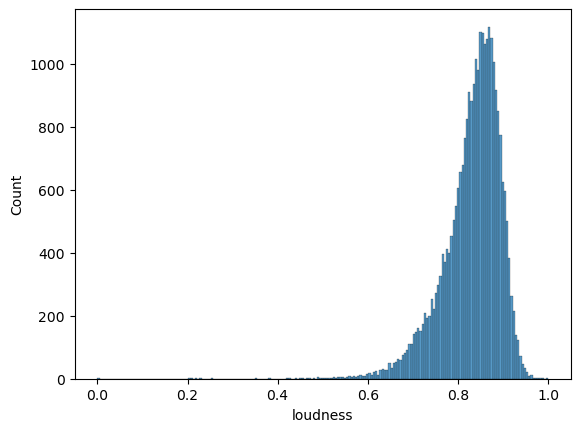

In [144]:
sns.histplot(df.loudness)

In [145]:
categorical = ['track_id', 'track_name', 'track_artist', 'track_album_id', 
               'playlist_name', 'playlist_id',
               'playlist_genre', 'playlist_subgenre']

numerical = ['track_popularity', 'danceability', 'energy', 'key', 
             'loudness', 'mode', 'speechiness', 
             'acousticness', 'instrumentalness', 'liveness', 'valence', 
             'tempo', 'duration_ms']

Which features influence valence?

In [146]:
correlation_matrix = df[numerical].corr().round(3)

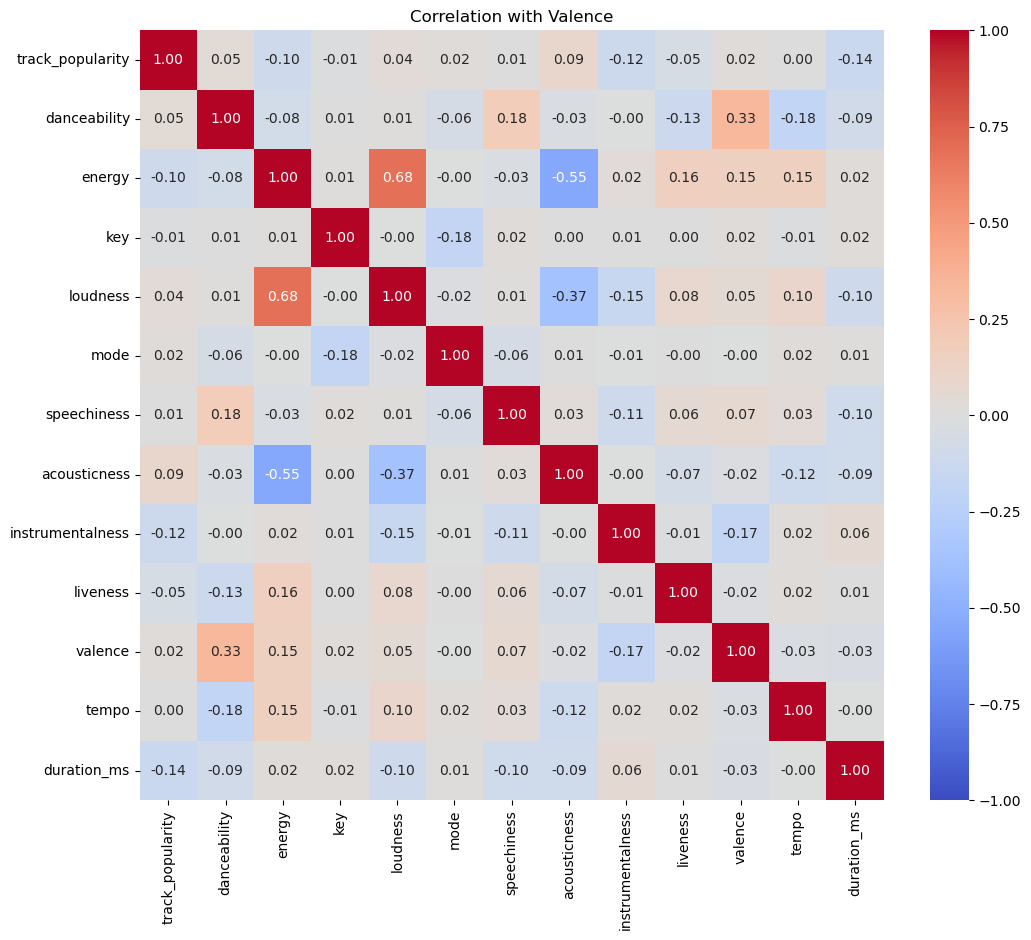

In [147]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation with Valence')
plt.show()

In [148]:
correlation_with_valence = correlation_matrix['valence'].abs().sort_values(ascending=False)
correlation_with_valence

valence             1.000
danceability        0.334
instrumentalness    0.174
energy              0.150
speechiness         0.065
loudness            0.049
duration_ms         0.034
tempo               0.025
track_popularity    0.022
key                 0.022
liveness            0.020
acousticness        0.019
mode                0.003
Name: valence, dtype: float64

energy and danceability have little positive correlation with valence, more than other numerical variables
- loudness and energy have a strong positive correlation
- acousticness and energy have a negative correlation
- acousticness and loudness have a negative correlation


### Split the dataset: 60 / 20 / 20


In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [150]:
df_columns = [
    'track_popularity',
    'playlist_genre',
    'playlist_subgenre',
    'acousticness',
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'speechiness',
    'tempo',
    'valence'
]

In [151]:
df = df[df_columns]
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.valence.values
y_val = df_val.valence.values
y_test = df_test.valence.values

del df_train['valence']
del df_val['valence']
del df_test['valence']

In [152]:
print(df_train.shape, df_val.shape, df_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(17010, 14) (5670, 14) (5671, 14)
(17010,) (5670,) (5671,)


In [153]:
df_train.head()

,track_popularity,playlist_genre,playlist_subgenre,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
0,71,edm,pop edm,0.2960,0.806,175973,0.560,0.000000,7,0.101,0.777235,1,0.0485,134.057
1,0,pop,dance pop,0.0192,0.684,200787,0.850,0.000137,5,0.589,0.903904,1,0.1090,129.963
2,41,pop,dance pop,0.2280,0.731,207493,0.661,0.005210,5,0.105,0.841732,0,0.0364,113.028
3,41,rap,trap,0.0317,0.569,185600,0.757,0.001630,10,0.112,0.818976,1,0.1240,150.134
4,28,pop,indie poptimism,0.0909,0.713,250548,0.824,0.041100,0,0.318,0.856254,1,0.0836,113.014


In [155]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

In [156]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

### Linear Regression

In [160]:
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
f'Linear Regression RMSE: {rmse}'

'Linear Regression RMSE: 0.19428489570891827'

In [162]:
lr.coef_

array([ 1.14560961e-01,  6.60660870e-01, -2.28711721e-07,  5.05054627e-01,
       -1.18874625e-01,  1.02429421e-03,  4.26830990e-04, -5.10228969e-01,
       -2.50178609e-03, -1.07844100e-01,  3.79275384e-02,  2.46891751e-03,
        3.21110777e-02, -3.83311952e-02,  7.36677619e-02,  1.81100837e-02,
       -1.06439655e-01,  7.63217165e-02, -2.42745649e-02, -2.04685494e-02,
        1.55651555e-03, -3.38151970e-02, -5.54333154e-02,  2.77221432e-02,
       -2.89799255e-02, -2.17755371e-02,  5.42783735e-03,  3.12270565e-02,
        1.94594729e-02,  7.89731576e-02,  3.46692771e-02,  5.01389224e-02,
        4.69625039e-02, -3.10748180e-02,  3.63969711e-02,  4.90248264e-02,
       -8.12629679e-02, -3.51243265e-02, -3.73416273e-02,  4.58155423e-02,
        4.47387146e-04, -1.60028493e-04])

In [163]:
dv.feature_names_

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'playlist_genre=edm',
 'playlist_genre=latin',
 'playlist_genre=pop',
 'playlist_genre=r&b',
 'playlist_genre=rap',
 'playlist_genre=rock',
 'playlist_subgenre=album rock',
 'playlist_subgenre=big room',
 'playlist_subgenre=classic rock',
 'playlist_subgenre=dance pop',
 'playlist_subgenre=electro house',
 'playlist_subgenre=electropop',
 'playlist_subgenre=gangster rap',
 'playlist_subgenre=hard rock',
 'playlist_subgenre=hip hop',
 'playlist_subgenre=hip pop',
 'playlist_subgenre=indie poptimism',
 'playlist_subgenre=latin hip hop',
 'playlist_subgenre=latin pop',
 'playlist_subgenre=neo soul',
 'playlist_subgenre=new jack swing',
 'playlist_subgenre=permanent wave',
 'playlist_subgenre=pop edm',
 'playlist_subgenre=post-teen pop',
 'playlist_subgenre=progressive electro house',
 'playlist_subgenre=reggaeton',
 'playlist_subgenre=southern hip hop',
 'playlist_

### Decision Tree

In [164]:
from sklearn.tree import DecisionTreeRegressor

In [168]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
f'Decision Tree RMSE: {rmse}'

'Decision Tree RMSE: 0.2596387154920871'

In [169]:
dt.get_n_leaves()

16715

In [170]:
dt.get_depth()

42

In [171]:
dt.feature_importances_

array([0.06872422, 0.18163846, 0.06714731, 0.12786325, 0.0696878 ,
       0.02851547, 0.06930826, 0.06650715, 0.00537573, 0.04618486,
       0.0033095 , 0.00746956, 0.0015117 , 0.00869381, 0.01161259,
       0.0010124 , 0.00089552, 0.00213818, 0.00294227, 0.00119374,
       0.0008829 , 0.00282523, 0.0009089 , 0.00110064, 0.00130431,
       0.00192936, 0.00178168, 0.001433  , 0.00180476, 0.00409233,
       0.00117009, 0.00153306, 0.00132092, 0.00078174, 0.001247  ,
       0.00208276, 0.00614486, 0.00430619, 0.00323933, 0.05918653,
       0.08566269, 0.04352994])

### Random Forest

In [172]:
from sklearn.ensemble import RandomForestRegressor

In [173]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
f'Random Forest RMSE: {rmse}'

'Random Forest RMSE: 0.18385233998837286'

### Tune the model

In [174]:
depths = [1, 2, 3, 4, 5, 10, 15, 20, 30, None]

for depth in depths:
    rf = RandomForestRegressor(max_depth=depth)

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    rmse = mean_squared_error(y_val, y_pred, squared=False)

    print('%4s -> %.3f' % (depth, rmse))

   1 -> 0.224
   2 -> 0.217
   3 -> 0.209
   4 -> 0.204
   5 -> 0.200
  10 -> 0.188
  15 -> 0.184
  20 -> 0.184
  30 -> 0.183
None -> 0.183


The best max_depth = 15

In [175]:
estimators = np.arange(1, 201, 10)

for n in estimators:
    rf = RandomForestRegressor(n_estimators=n)

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)

    print('%4s -> %.3f' % (n, rmse))

   1 -> 0.265
  11 -> 0.190
  21 -> 0.188
  31 -> 0.185
  41 -> 0.185
  51 -> 0.184
  61 -> 0.184
  71 -> 0.185
  81 -> 0.184
  91 -> 0.184
 101 -> 0.184
 111 -> 0.183
 121 -> 0.183
 131 -> 0.183
 141 -> 0.183
 151 -> 0.184
 161 -> 0.183
 171 -> 0.183
 181 -> 0.183
 191 -> 0.183


The model stops to perform n_estimators = 51

In [176]:
# Let's try different max_depth and min_samples_leaf values
scores = []

for depth in [1, 5, 10, 15]:
    for s in [1, 3, 5, 10]:
        
        rf = RandomForestRegressor(max_depth=depth,
                                   min_samples_leaf=s)

        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)

        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)

        scores.append((depth, s, rmse))

In [177]:
columns = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                                  columns=['max_depth'],
                                  values=['rmse'])

df_scores_pivot.round(4)

rmse                        
max_depth             1       5       10      15
min_samples_leaf                                
1                 0.2239  0.2003  0.1882  0.1850
3                 0.2239  0.2004  0.1878  0.1842
5                 0.2238  0.2003  0.1881  0.1844
10                0.2237  0.2002  0.1884  0.1851

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

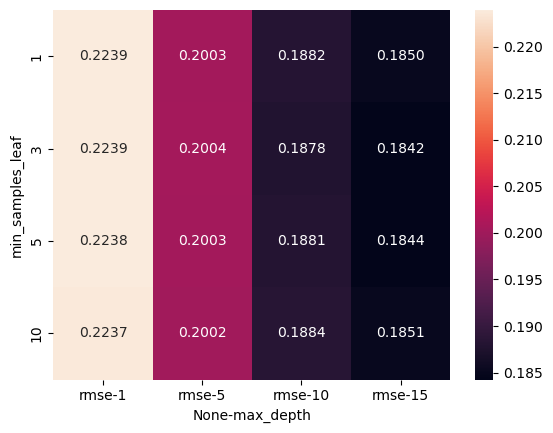

In [178]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.4f')

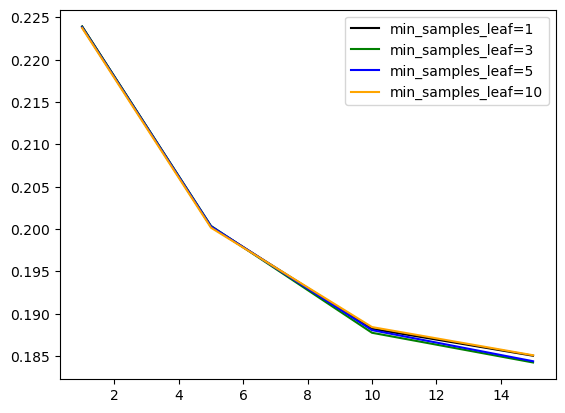

In [179]:
values = [1, 3, 5, 10]
colors = ['black', 'green', 'blue', 'orange']

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(df_subset.max_depth, df_subset.rmse,
             color=col,
             label='min_samples_leaf=%s' % s)

plt.legend()

The best values for our model

- max_depth = 15
- min_samples_leaf = 3
- num_estimators = 51

In [182]:
features = dv.get_feature_names_out()
features

feature_importance = rf.feature_importances_

df_features = pd.DataFrame(list([features, rf.feature_importances_])).T
df_features.sort_values(by=1, ascending=False)[:7]

,0,1
1,danceability,0.243338
3,energy,0.157745
9,playlist_genre=edm,0.0756
40,tempo,0.068277
4,instrumentalness,0.0663
6,liveness,0.054839
2,duration_ms,0.05232


The most important features:
- danceability, energy, tempo, instrumentalness, liveness, duration_ms

### Feature Selection

In [183]:
features = ['danceability', 'energy', 'instrumentalness', 
            'tempo', 'duration_ms', 'liveness']

In [184]:
train_dicts = df_train[features].to_dict(orient='records')
val_dicts = df_val[features].to_dict(orient='records')

In [185]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

y_train = 

In [189]:
X_train.shape

(17010, 6)

In [190]:
y_train.shape

(17010,)

In [195]:
rf = RandomForestRegressor(n_estimators = 100,
                           max_depth = 15,
                           min_samples_leaf = 3,
                           criterion='squared_error',
                           random_state=42
                           )

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
f'RMSE score: {rmse}'

'RMSE score: 0.19977576079238601'

The model was not better 

### Best Random Forest Model

In [196]:
model_columns = [
    'track_popularity',
    'playlist_genre',
    'playlist_subgenre',
    'acousticness',
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'speechiness',
    'tempo'
]

train_dicts = df_train[model_columns].to_dict(orient='records')
val_dicts = df_val[model_columns].to_dict(orient='records')
test_dicts = df_test[model_columns].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [197]:
rf = RandomForestRegressor(n_estimators = 61,
                           max_depth = 20,
                           min_samples_leaf = 3,
                           criterion='squared_error',
                           random_state=42
                           )

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)

rmse_val = mean_squared_error(y_val, y_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print(rmse_val, rmse_test)

0.18401530674609864 0.181719823286122


Train on full dataset

In [216]:
df_full_train

,track_popularity,playlist_genre,playlist_subgenre,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
8150,0,rap,southern hip hop,0.121000,0.699,199197,0.899,0.000000,0,0.0430,0.855919,1,0.1200,130.102
23549,34,r&b,hip pop,0.479000,0.727,270720,0.606,0.000000,9,0.4140,0.803889,1,0.5120,104.588
6800,52,rap,hip hop,0.254000,0.698,201290,0.631,0.000000,9,0.2410,0.779582,1,0.3960,83.084
15998,0,rock,hard rock,0.000035,0.256,389333,0.863,0.004050,5,0.3640,0.835362,1,0.1060,158.947
17914,0,latin,latin pop,0.222000,0.847,228545,0.798,0.000000,9,0.0675,0.870063,1,0.0500,121.981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24678,13,r&b,new jack swing,0.029500,0.887,239733,0.416,0.000011,1,0.0660,0.819353,1,0.0518,94.013
5769,58,rap,hip hop,0.017400,0.807,175500,0.674,0.000006,1,0.0610,0.827861,1,0.1190,94.984
860,31,pop,dance pop,0.005980,0.589,213723,0.592,0.000000,7,0.0614,0.808017,0,0.0334,141.131
17259,46,latin,tropical,0.030900,0.681,181135,0.814,0.000267,7,0.1620,0.877816,1,0.0317,124.047


In [212]:
y_train = df_full_train.valence.values

del df_full_train['valence']

AttributeError: 'DataFrame' object has no attribute 'valence'

In [208]:
def train(df_train, y_train):
    dicts = df_train[model_columns].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)

    X_train = dv.fit_transform(dicts)

    model = RandomForestRegressor(n_estimators = 61,
                           max_depth = 20,
                           min_samples_leaf = 3,
                           criterion='squared_error',
                           random_state=42
                           )

    model.fit(X_train, y_train)

    return dv, model

In [213]:
dv, model = train(df_full_train, y_train)

In [217]:
model

RandomForestRegressor(max_depth=20, min_samples_leaf=3, n_estimators=61,
                      random_state=42)

In [218]:
dv

DictVectorizer(sparse=False)

In [234]:
def predict(df, dv, model):
    dicts = df[model_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict(X)

    for pred in y_pred:
        if pred >= 0.65:
            print('Awesome, play it!')
        else:
            print('Choose another track')

    return y_pred

In [235]:
y_pred = predict(df_test, dv, model)

Awesome, play it!
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Awesome, play it!
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Awesome, play it!
Choose another track
Choose another track
Awesome, play it!
Choose another track
Awesome, play it!
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Awesome, play it!
Choose another track
Awesome, play it!
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Choose another track
Awesome, play it!
Choose another track
Awesome, play it!
Awesome, play it!
C

In [229]:
y_pred

array([0.65231009, 0.38505514, 0.39424151, ..., 0.48411457, 0.43988483,
       0.65951639])

### Save the model

In [237]:
import pickle

output_file = 'rf_model.bin'

In [238]:
output_file

'rf_model.bin'

In [239]:
f_out = open(output_file, 'wb')     # open for write binary
pickle.dump((dv, model), f_out)     # to save the dv and model
f_out.close()                       # close the file

In [240]:
with open(output_file, 'wb') as f_out: 
    pickle.dump((dv, model), f_out)

Load the model

In [1]:
import pickle

input_file = 'rf_model.bin'

with open(input_file, 'rb') as f_in: 
    dv, model = pickle.load(f_in)

In [2]:
model

RandomForestRegressor(max_depth=20, min_samples_leaf=3, n_estimators=61,
                      random_state=42)

In [10]:
dv

DictVectorizer(sparse=False)

In [15]:
new_track = {
    'track_popularity': 50,
    'playlist_genre': 'pop',
    'playlist_subgenre': 'dance pop',
    'acousticness': 0.1,
    'danceability': 0.6,
    'duration_ms': 230000,
    'energy': 0.8,
    'instrumentalness': 0,
    'key': 5,
    'liveness': 0.15,
    'loudness': 0.5,
    'mode': 0,
    'speechiness': 0.4,
    'tempo': 130
}

In [17]:
X = dv.transform([new_track])

In [18]:
y_pred = model.predict(X)
y_pred

array([0.58308727])

In [19]:
print('input:', new_track)
print('output:', y_pred)

input: {'track_popularity': 50, 'playlist_genre': 'pop', 'playlist_subgenre': 'dance pop', 'acousticness': 0.1, 'danceability': 0.6, 'duration_ms': 230000, 'energy': 0.8, 'instrumentalness': 0, 'key': 5, 'liveness': 0.15, 'loudness': 0.5, 'mode': 0, 'speechiness': 0.4, 'tempo': 130}
output: [0.58308727]
